In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/healthcare-dataset-stroke-data.csv"

df = pd.read_csv(url)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

                   결측치 개수  결측치 비율(%)
id                      0   0.000000
gender                  0   0.000000
age                     0   0.000000
hypertension            0   0.000000
heart_disease           0   0.000000
ever_married            0   0.000000
work_type               0   0.000000
Residence_type          0   0.000000
avg_glucose_level       0   0.000000
bmi                   201   3.933464
smoking_status          0   0.000000
stroke                  0   0.000000


In [15]:
#결측치 개수 확인 (적용 전)
print("결측치 개수(적용 전):", df["bmi"].isnull().sum())

# 평균 나이 계산
mean_age = df["bmi"].mean()

# 결측치를 평균 나이로 채우기 
df["bmi"] = df["bmi"].fillna(mean_age)  

# 결측치 개수 확인 (적용 후)
print("결측치 개수(적용 후):", df["bmi"].isnull().sum())

# 평균 나이 출력
print(f"평균 나이로 채움: {mean_age:.2f}")

print(df["bmi"])

결측치 개수(적용 전): 201
결측치 개수(적용 후): 0
평균 나이로 채움: 28.89
0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64


stroke
0    4861
1     249
Name: count, dtype: int64
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


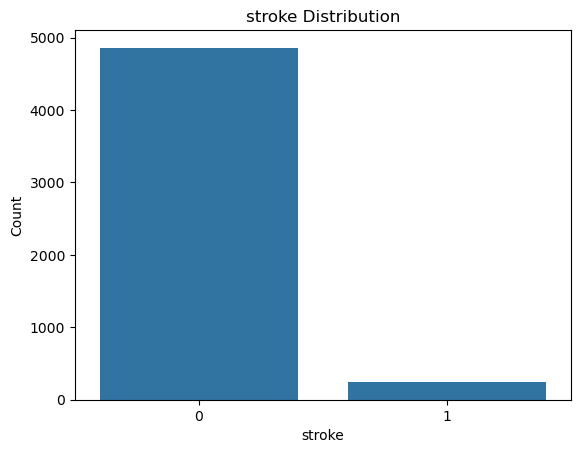

In [23]:
# 레이블 분포 확인
print(df["stroke"].value_counts())  # 클래스 개수 출력
print(df["stroke"].value_counts(normalize=True) * 100)  # 비율(%) 출력

# 시각화
sns.countplot(x="stroke", data=df)
plt.title("stroke Distribution")
plt.xlabel("stroke")
plt.ylabel("Count")
plt.show()

In [25]:
# 라벨 인코더 생성 및 적용
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

# 결과 확인
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,1,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### male > 1 / female > 0

In [32]:
# 삭제할 칼럼 지정 (ever_married, Residence_type, smoking_status, id , work_type 컬럼 삭제)
df.drop(columns=['id', 'ever_married', 'Residence_type', 'smoking_status'], inplace=True)

# 변경된 데이터프레임 확인
df

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,Private,228.69,36.600000,1
1,0,61.0,0,0,Self-employed,202.21,28.893237,1
2,1,80.0,0,1,Private,105.92,32.500000,1
3,0,49.0,0,0,Private,171.23,34.400000,1
4,0,79.0,1,0,Self-employed,174.12,24.000000,1
...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Private,83.75,28.893237,0
5106,0,81.0,0,0,Self-employed,125.20,40.000000,0
5107,0,35.0,0,0,Self-employed,82.99,30.600000,0
5108,1,51.0,0,0,Private,166.29,25.600000,0


In [34]:
df.drop(columns=['work_type'], inplace=True)
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,228.69,36.600000,1
1,0,61.0,0,0,202.21,28.893237,1
2,1,80.0,0,1,105.92,32.500000,1
3,0,49.0,0,0,171.23,34.400000,1
4,0,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...
5105,0,80.0,1,0,83.75,28.893237,0
5106,0,81.0,0,0,125.20,40.000000,0
5107,0,35.0,0,0,82.99,30.600000,0
5108,1,51.0,0,0,166.29,25.600000,0


In [36]:
X = df.drop(columns=["stroke"])
y = df["stroke"] 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [40]:
X = X.values

In [44]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4088, 6), (1022, 6), (4088,), (1022,))

In [52]:
model = Sequential()

model.add(Dense(10,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\hash0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 776 (3.03 KB)

 Trainable params: 776 (3.03 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=25,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

Epoch 1/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9527 - loss: 0.1617 - val_accuracy: 0.9472 - val_loss: 0.2002
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9517 - loss: 0.1727 - val_accuracy: 0.9462 - val_loss: 0.1956
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9531 - loss: 0.1727 - val_accuracy: 0.9413 - val_loss: 0.2038
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9490 - loss: 0.1720 - val_accuracy: 0.9462 - val_loss: 0.2018
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9560 - loss: 0.1604 - val_accuracy: 0.9472 - val_loss: 0.2020
Epoch 6/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9518 - loss: 0.1720 - val_accuracy: 0.9472 - val_loss: 0.1924
Epoch 7/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9479 - loss: 0.1789 - val_accuracy: 0.9472 - val_loss: 0.2178
Epoch 8/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9543 - loss: 0.1578 - val_accuracy: 0.

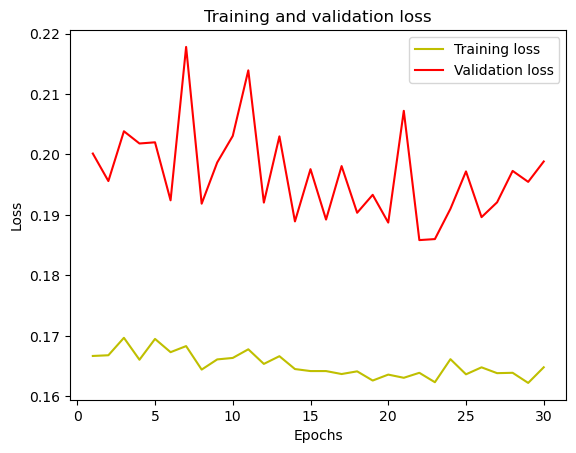

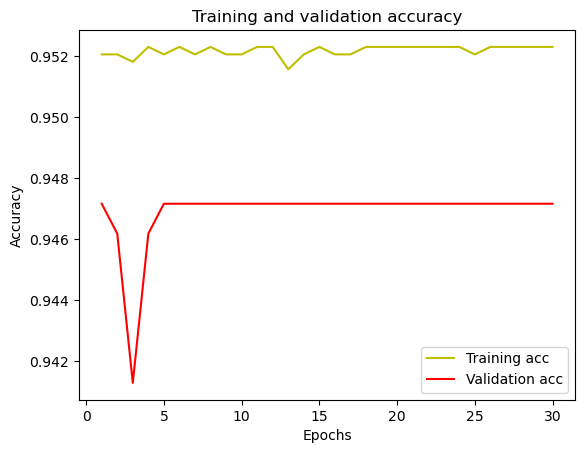

In [60]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()